## Выпускной Проект. Промышленность

### Описание проекта

Чтобы оптимизировать производственные расходы, металлургический комбинат «Стальная птица» решил уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава. Ваша задача — построить модель, которая будет её предсказывать. 
Заказчик хочет использовать разработанную модель для имитации технологического процесса. Ниже расскажем о деталях этого процесса. Их важно знать, прежде чем генерировать новые признаки.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 
Из сплава выводится сера (этот процесс — десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).
Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.
Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

### Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:
- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

**Файл `data_arc_new.csv`**

- `key` — номер партии;
- `Начало нагрева дугой` — время начала нагрева;
- `Конец нагрева дугой` — время окончания нагрева;
- `Активная мощность` — значение активной мощности;
- `Реактивная мощность` — значение реактивной мощности.

**Файл `data_bulk_new.csv`**

- `key` — номер партии;
- `Bulk 1 … Bulk 15` — объём подаваемого материала.

**Файл `data_bulk_time_new.csv`**

- `key` — номер партии;
- `Bulk 1 … Bulk 15` — время подачи материала.

**Файл `data_gas_new.csv`**

- `key` — номер партии;
- `Газ 1` — объём подаваемого газа.

**Файл `data_temp_new.csv`**

- `key` — номер партии;
- `Время замера` — время замера;
- `Температура` — значение температуры.

**Файл `data_wire_new.csv`**

- `key` — номер партии;
- `Wire 1 … Wire 9` — объём подаваемых проволочных материалов.

**Файл `data_wire_time_new.csv`**

- `key` — номер партии;
- `Wire 1 … Wire 9` — время подачи проволочных материалов.

Во всех файлах столбец key содержит номер партии. В файлах может быть несколько строк с одинаковым значением key: они соответствуют разным итерациям обработки.

### План работы

- Загрузка данных
- Исследовательский анализ и предобработка данных
- Объединение данных
- Исследовательский анализ и предобработка данных объединённого датафрейма
- Подготовка данных
- Обучение моделей машинного обучения
- Выбор лучшей модели
- Общий вывод и рекомендации заказчику

## Загрузка данных

In [1]:
!pip install phik -q
!pip install -U scikit-learn -q
!pip install shap -q

In [2]:
# Импорт
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import phik
import shap

from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Загрузим данные

In [4]:
try:
    data_arc = pd.read_csv('/datasets/data_arc_new.csv', sep=',', decimal='.')
    data_bulk = pd.read_csv('/datasets/data_bulk_new.csv', sep=',', decimal='.')
    data_bulk_time = pd.read_csv('/datasets/data_bulk_time_new.csv', sep=',', decimal='.')
    data_gas = pd.read_csv('/datasets/data_gas_new.csv', sep=',', decimal='.')
    data_temp = pd.read_csv('/datasets/data_temp_new.csv', sep=',', decimal='.')
    data_wire = pd.read_csv('/datasets/data_wire_new.csv', sep=',', decimal='.')
    data_wire_time = pd.read_csv('/datasets/data_wire_time_new.csv', sep=',', decimal='.')
except:
    data_arc = pd.read_csv('data_arc_new.csv', sep=',', decimal='.')
    data_bulk = pd.read_csv('data_bulk_new.csv', sep=',', decimal='.')
    data_bulk_time = pd.read_csv('data_bulk_time_new.csv', sep=',', decimal='.')
    data_gas = pd.read_csv('data_gas_new.csv', sep=',', decimal='.')
    data_temp = pd.read_csv('data_temp_new.csv', sep=',', decimal='.')
    data_wire = pd.read_csv('data_wire_new.csv', sep=',', decimal='.')
    data_wire_time = pd.read_csv('data_wire_time_new.csv', sep=',', decimal='.')

In [5]:
# Функция для вывода инфо
def data_info(data):
    display(data.head(5))
    data.info()

In [6]:
data_info(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [7]:
data_info(data_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.3 KB


In [8]:
data_info(data_bulk_time)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.3+ KB


In [9]:
data_info(data_gas)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [10]:
data_info(data_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [11]:
data_info(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [12]:
data_info(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


## Выводы
- Датафреймы успешно загружены
- Названия столбцов необходимо привести к формату snake_case
- В датафреймах связанных с bulk и wire имеется большое количество пропусков

## Исследовательский анализ и предобработка данных

In [13]:
# Функция для подсчёта пропусков и явных дубликатов
def na_and_duplicates(data):
    print('Количество пропусков:')
    print(data.isna().sum())
    print(f'Количество явных дубликатов: {data.duplicated().sum()}')

In [14]:
def drop_duplicates(data):
    data.drop_duplicates(inplace=True)
    print(f'Количество явных дубликатов: {data.duplicated().sum()}')

In [15]:
def plot_histogram(data, column, bins=30):
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=bins, kde=True, color='blue')

    plt.title(f'Гистограмма {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Частота', fontsize=12)
    
    # Показ графика
    plt.show()
    
    print(f"Описательная статистика столбца: '{column}':")
    display(data[column].describe())

### data_arc - Данные об электродах

Рассмотрим датафрейм с данными об электродах

In [16]:
na_and_duplicates(data_arc)

Количество пропусков:
key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64
Количество явных дубликатов: 0


Пропусков и дубликатов не обноружено
Переведем названия столбцов на английский язык и приведем их к формату snake_case

In [17]:
data_arc.columns = ['key', 'heating_start', 'heating_end', 'active_power', 'reactive_power']

Приведем столбцы с датой к типу datetime

In [18]:
data_arc['heating_start'] = pd.to_datetime(data_arc['heating_start'])
data_arc['heating_end'] = pd.to_datetime(data_arc['heating_end'])
data_info(data_arc)

,key,heating_start,heating_end,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   heating_start   14876 non-null  datetime64[ns]
 2   heating_end     14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


Посмотрим на распределение признака `active_power`

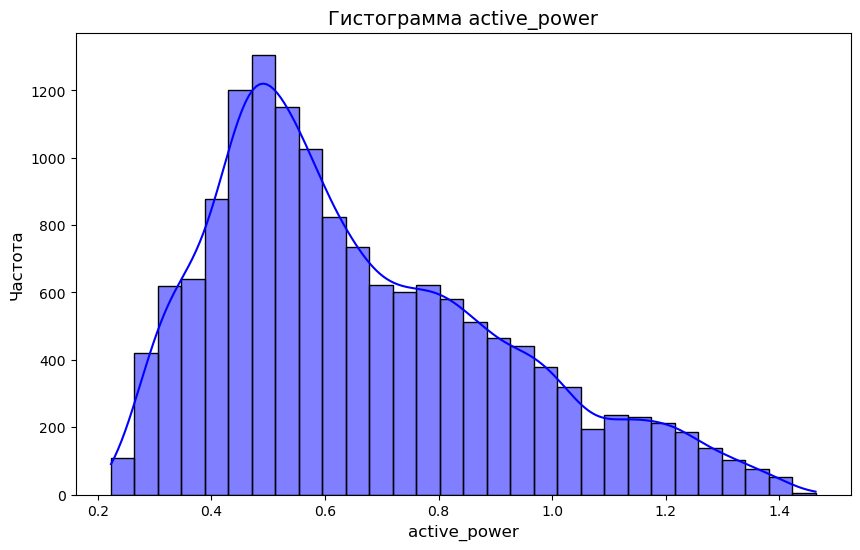

Описательная статистика столбца: 'active_power':


count    14876.000000
mean         0.662752
std          0.258885
min          0.223120
25%          0.467115
50%          0.599587
75%          0.830070
max          1.463773
Name: active_power, dtype: float64

In [19]:
plot_histogram(data_arc, 'active_power')

Признак имеет распределение Пуассона, аномалий и выбросов не обнаружено. Медиана находится на уровне `0.6` единиц.
Посмотрим на распределение признака `reactive_power`

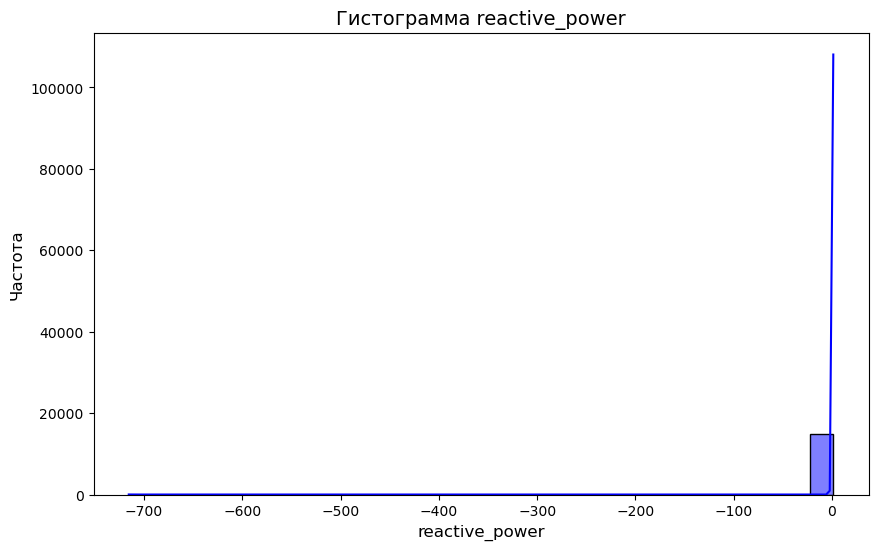

Описательная статистика столбца: 'reactive_power':


count    14876.000000
mean         0.438986
std          5.873485
min       -715.479924
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: reactive_power, dtype: float64

In [20]:
plot_histogram(data_arc, 'reactive_power')

Имеется аномальное значение с минусовой энергией. Предлагаю заполнить его средним значением по партии.

In [21]:
display(data_arc[data_arc['reactive_power'] < 0])

,key,heating_start,heating_end,active_power,reactive_power
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [22]:
# Вычисляем среднее значение
mean_value = data_arc[(data_arc['key'] == 2116) & (data_arc['reactive_power'] >= 0)]['reactive_power'].mean()

# Заполняем отрицательные значения средним
data_arc.loc[(data_arc['key'] == 2116) & (data_arc['reactive_power'] < 0), 'reactive_power'] = mean_value

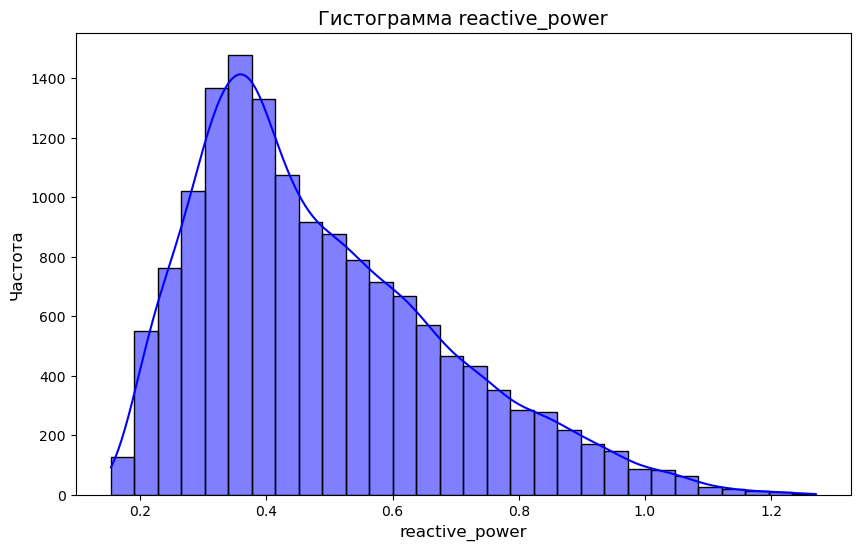

Описательная статистика столбца: 'reactive_power':


count    14876.000000
mean         0.487117
std          0.197606
min          0.153777
25%          0.337192
50%          0.441667
75%          0.608201
max          1.270284
Name: reactive_power, dtype: float64

In [23]:
plot_histogram(data_arc, 'reactive_power')

Признак имеет распределение Пуассона. Медиана находится на уровне `0.44` единиц.

### data_bulk - данные о подаче сыпучих материалов (объём)

Рассмотрим датафрейм с данными о подаче сыпучих материалов (объём)

In [24]:
na_and_duplicates(data_bulk)

Количество пропусков:
key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64
Количество явных дубликатов: 0


В данных имеется большое количество пропусков. Корректно заполнить их не имеем возможности. Предлагаю удалить столбцы с менее чем 100 заполненными строками

In [25]:
data_bulk = data_bulk.dropna(axis=1, thresh=100)

Необходимо привести названия столбцов к формату snake_case

In [26]:
data_bulk.columns = [col.replace(' ', '_').replace('Bulk', 'bulk') for col in data_bulk.columns]

In [27]:
data_info(data_bulk)

,key,bulk_1,bulk_3,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15
0,1,NaN,NaN,43.0,NaN,NaN,NaN,206.0,150.0,154.0
1,2,NaN,NaN,73.0,NaN,NaN,NaN,206.0,149.0,154.0
2,3,NaN,NaN,34.0,NaN,NaN,NaN,205.0,152.0,153.0
3,4,NaN,NaN,81.0,NaN,NaN,NaN,207.0,153.0,154.0
4,5,NaN,NaN,78.0,NaN,NaN,NaN,203.0,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_3   1298 non-null   float64
 3   bulk_4   1014 non-null   float64
 4   bulk_6   576 non-null    float64
 5   bulk_10  176 non-null    float64
 6   bulk_11  177 non-null    float64
 7   bulk_12  2450 non-null   float64
 8   bulk_14  2806 non-null   float64
 9   bulk_15  2248 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 244.6 KB


Выведем описательную статистику по каждому из столбцов

In [28]:
data_bulk.drop('key', axis=1).describe()

,bulk_1,bulk_3,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15
count,252.000000,1298.000000,1014.000000,576.000000,176.000000,177.000000,2450.000000,2806.000000,2248.000000
mean,39.242063,113.879045,104.394477,118.925347,83.284091,76.819209,260.471020,170.284747,160.513345
std,18.277654,75.483494,48.184126,72.057776,26.060347,59.655365,120.649269,65.868652,51.765319
min,10.000000,6.000000,12.000000,17.000000,24.000000,8.000000,53.000000,16.000000,1.000000
25%,27.000000,58.000000,72.000000,69.750000,64.000000,25.000000,204.000000,119.000000,105.000000
50%,31.000000,97.500000,102.000000,100.000000,86.500000,64.000000,208.000000,151.000000,160.000000
75%,46.000000,152.000000,133.000000,157.000000,102.000000,106.000000,316.000000,205.750000,205.000000
max,185.000000,454.000000,281.000000,503.000000,159.000000,313.000000,1849.000000,636.000000,405.000000


Заполним пропуски нулями

In [29]:
data_bulk = data_bulk.fillna(0)
data_info(data_bulk)

,key,bulk_1,bulk_3,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15
0,1,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0
1,2,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0
2,3,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0
3,4,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0
4,5,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   3129 non-null   float64
 2   bulk_3   3129 non-null   float64
 3   bulk_4   3129 non-null   float64
 4   bulk_6   3129 non-null   float64
 5   bulk_10  3129 non-null   float64
 6   bulk_11  3129 non-null   float64
 7   bulk_12  3129 non-null   float64
 8   bulk_14  3129 non-null   float64
 9   bulk_15  3129 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 244.6 KB


### data_bulk_time - Данные о подаче сыпучих материалов (время);

Рассмотрим датафрейм с данными о подаче сыпучих материалов (время)

In [30]:
na_and_duplicates(data_bulk_time)

Количество пропусков:
key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64
Количество явных дубликатов: 0


В данных имеется большое количество пропусков, столько же как в датафреме `data_bulk`. Корректно заполнить их не имеем возможности. Предлагаю удалить столбцы с менее чем 100 заполненными строками

In [31]:
data_bulk_time = data_bulk_time.dropna(axis=1, thresh=100)

Необходимо привести названия столбцов к формату snake_case

In [32]:
data_bulk_time.columns = [col.replace(' ', '_').replace('Bulk', 'bulk') for col in data_bulk_time.columns]

Приведем столбцы с датой к типу datetime

In [33]:
for col in data_bulk_time.columns:
    if 'bulk' in col:
        data_bulk_time[col] = pd.to_datetime(data_bulk_time[col])

In [34]:
data_info(data_bulk_time)

,key,bulk_1,bulk_3,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15
0,1,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_3   1298 non-null   datetime64[ns]
 3   bulk_4   1014 non-null   datetime64[ns]
 4   bulk_6   576 non-null    datetime64[ns]
 5   bulk_10  176 non-null    datetime64[ns]
 6   bulk_11  177 non-null    datetime64[ns]
 7   bulk_12  2450 non-null   datetime64[ns]
 8   bulk_14  2806 non-null   datetime64[ns]
 9   bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 244.6 KB


Предлагаю рассмотреть периоды на наличие аномалий

In [35]:
# Выбираем только столбцы с датой
time_columns = data_bulk_time.select_dtypes(include=['datetime']).columns

# Собираем данные по каждому столбцу
summary = []
for col in time_columns:
    col_min = data_bulk_time[col].min()
    col_max = data_bulk_time[col].max()
    col_range = col_max - col_min
    summary.append({
        'column': col,
        'min_date': col_min,
        'max_date': col_max,
        'range': col_range
    })

time_summary_df = pd.DataFrame(summary)

display(time_summary_df)

,column,min_date,max_date,range
0,bulk_1,2019-05-03 17:42:46,2019-09-05 09:11:32,124 days 15:28:46
1,bulk_3,2019-05-03 20:40:25,2019-09-06 12:26:52,125 days 15:46:27
2,bulk_4,2019-05-03 11:28:48,2019-09-05 03:35:21,124 days 16:06:33
3,bulk_6,2019-05-03 19:09:15,2019-09-06 16:24:28,125 days 21:15:13
4,bulk_10,2019-05-06 07:54:02,2019-09-04 10:03:22,121 days 02:09:20
5,bulk_11,2019-05-05 23:43:24,2019-09-06 05:03:14,123 days 05:19:50
6,bulk_12,2019-05-03 11:24:31,2019-09-06 15:01:44,126 days 03:37:13
7,bulk_14,2019-05-03 11:14:50,2019-09-06 17:26:33,126 days 06:11:43
8,bulk_15,2019-05-03 11:10:43,2019-09-06 17:23:15,126 days 06:12:32


Аномалий по разбросу не отбнаружено

### data_gas - Данные о продувке сплава газом

Рассмотрим датафрейм с данными о продувке сплава газом

In [36]:
na_and_duplicates(data_gas)

Количество пропусков:
key      0
Газ 1    0
dtype: int64
Количество явных дубликатов: 0


Пропусков и дубликатов не обнаружено

In [37]:
data_gas.columns = ['key', 'gas_1']

Рассмотрим распределение приизнака `gas_1`

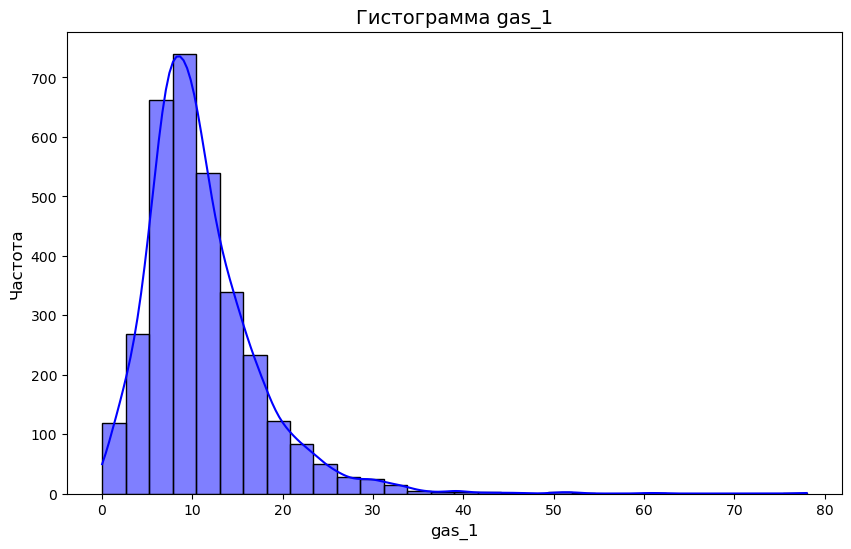

Описательная статистика столбца: 'gas_1':


count    3239.000000
mean       11.002062
std         6.220327
min         0.008399
25%         7.043089
50%         9.836267
75%        13.769915
max        77.995040
Name: gas_1, dtype: float64

In [38]:
plot_histogram(data_gas, 'gas_1')

Имеются выбросы после 40 единиц. Уберём их из обучающей выборки. Медиана находится на уровне `9.8` единиц.

### data_temp - Результаты измерения температуры

Рассмотрим датафрейм с результатами измерения температуры

In [39]:
na_and_duplicates(data_temp)

Количество пропусков:
key                0
Время замера       0
Температура     3427
dtype: int64
Количество явных дубликатов: 0


Имеются пропуски, предлагаю их удалить

In [40]:
data_temp = data_temp.dropna()

Переведем названия столбцов на английский языкк и приведем их к формату snake_case

In [41]:
data_temp.columns = ['key', 'time', 'temp']

Рассмотрим распределение признака `temp`

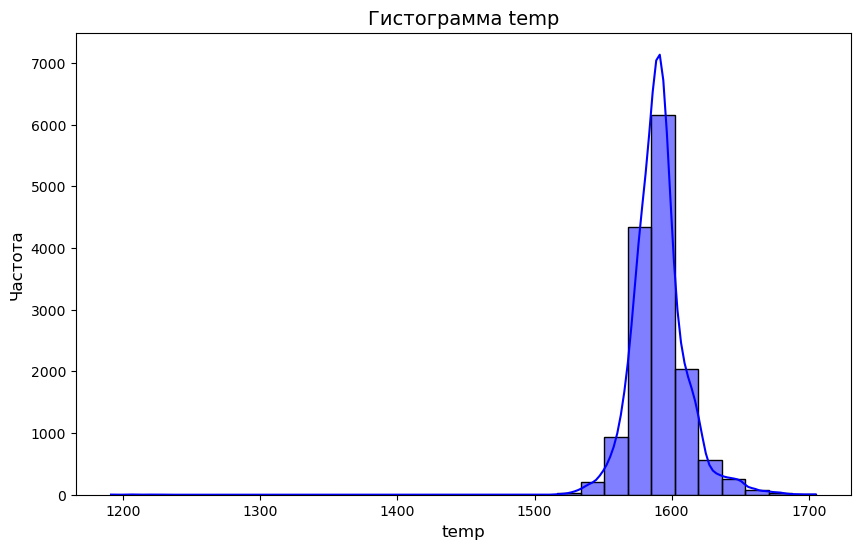

Описательная статистика столбца: 'temp':


count    14665.000000
mean      1590.722741
std         20.394381
min       1191.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temp, dtype: float64

In [42]:
plot_histogram(data_temp, 'temp')

Температура дожна быть больше 1500 градусов. Избавимся от аномалий. 

In [43]:
data_temp = data_temp[data_temp['temp'] > 1500]

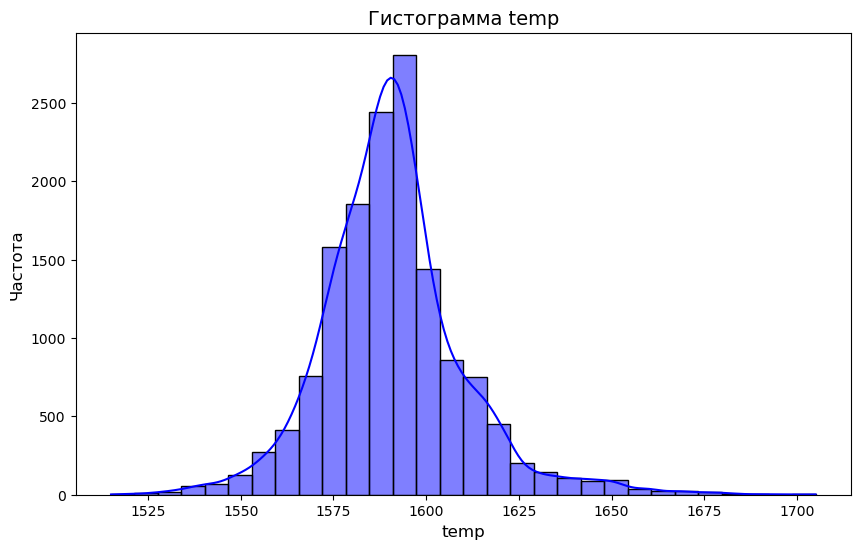

Описательная статистика столбца: 'temp':


count    14660.000000
mean      1590.852729
std         19.143141
min       1515.000000
25%       1580.000000
50%       1590.000000
75%       1599.000000
max       1705.000000
Name: temp, dtype: float64

In [44]:
plot_histogram(data_temp, 'temp')

Медиана и среднее находятся на уровне `1590` градусов. 

Приведём дату к формату datetime

In [45]:
data_temp['time'] = pd.to_datetime(data_temp['time'])

In [46]:
data_info(data_temp)

,key,time,temp
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


<class 'pandas.core.frame.DataFrame'>
Index: 14660 entries, 0 to 18086
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     14660 non-null  int64         
 1   time    14660 non-null  datetime64[ns]
 2   temp    14660 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 458.1 KB


### data_wire - данные о проволочных материалах (объём)

Рассмотрим датафрейм с проволочными материалами (объём)

In [47]:
na_and_duplicates(data_wire)

Количество пропусков:
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
Количество явных дубликатов: 0


В данных имеется большое количество пропусков. Корректно заполнить их не имеем возможности. Предлагаю удалить столбцы с менее чем 100 заполненными строками

In [48]:
data_wire = data_wire.dropna(axis=1, thresh=100)

Приведём названия столбцов к формату snake_case

In [49]:
data_wire.columns = [col.replace(' ', '_').replace('Wire', 'wire') for col in data_wire.columns]

In [50]:
data_info(data_wire)

,key,wire_1,wire_2
0,1,60.059998,NaN
1,2,96.052315,NaN
2,3,91.160157,NaN
3,4,89.063515,NaN
4,5,89.238236,9.11456


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 72.3 KB


Выведем описательную статистику по каждому из столбцов

In [51]:
data_wire.drop('key', axis=1).describe()

,wire_1,wire_2
count,3055.000000,1079.000000
mean,100.895853,50.577323
std,42.012518,39.320216
min,1.918800,0.030160
25%,72.115684,20.193680
50%,100.158234,40.142956
75%,126.060483,70.227558
max,330.314424,282.780152


Заполним пропуски нулями

In [52]:
data_wire = data_wire.fillna(0)

### data_wire_time - Данные о проволочных материалах (время);

Рассмотрим датафрейм с данными о проволочных материалах (время)

In [53]:
na_and_duplicates(data_wire_time)

Количество пропусков:
key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64
Количество явных дубликатов: 0


В данных имеется большое количество пропусков, столько же как в датафреме `data_bulk`. Корректно заполнить их не имеем возможности. Предлагаю удалить столбцы с менее чем 100 заполненными строками

In [54]:
data_wire_time = data_wire_time.dropna(axis=1, thresh=100)

Приведём названия столбцов к формату snake_case

In [55]:
data_wire_time.columns = [col.replace(' ', '_').replace('Wire', 'wire') for col in data_wire_time.columns]

Столбцы с датой приведем к типу datetime

In [56]:
for col in data_wire_time.columns:
    if 'wire' in col:
        data_wire_time[col] = pd.to_datetime(data_wire_time[col])

In [57]:
data_info(data_wire_time)

,key,wire_1,wire_2
0,1,2019-05-03 11:06:19,NaT
1,2,2019-05-03 11:36:50,NaT
2,3,2019-05-03 12:11:46,NaT
3,4,2019-05-03 12:43:22,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 72.3 KB


Проверим периоды на наличие аномалий

In [58]:
# Выбираем только столбцы с датой
time_columns = data_wire_time.select_dtypes(include=['datetime']).columns

# Собираем данные по каждому столбцу
summary = []
for col in time_columns:
    col_min = data_wire_time[col].min()
    col_max = data_wire_time[col].max()
    col_range = col_max - col_min
    summary.append({
        'column': col,
        'min_date': col_min,
        'max_date': col_max,
        'range': col_range
    })

time_summary_df = pd.DataFrame(summary)

display(time_summary_df)

,column,min_date,max_date,range
0,wire_1,2019-05-03 11:06:19,2019-09-06 17:10:06,126 days 06:03:47
1,wire_2,2019-05-03 13:15:34,2019-09-06 07:35:40,125 days 18:20:06


Аномалий не обнаружено

### Выводы

- Привели названия столбцов к формату `snake_case`
- Привели столбцы с датами к типу `datetime`
- `active_power` - Признак имеет распределение Пуассона, аномалий и выбросов не обнаружено. Медиана находится на уровне `0.6` единиц.
- `reactive_power` - Удалена аномалия с отрицательной температурой. Признак имеет распределение Пуассона. Медиана находится на уровне `0.44` единиц.
- Из датафреймов `bulk` и `wire` удалены столбцы имеющие менее 100 строк с заполненными данными
- Заполили пропуски в датафреймах `data_bulk` и `data_wire`нулями
- Аномалий в датах не обнаружено
- `gas-1` - Имеются выбросы после 40 единиц. Уберём их из обучающей выборки. Медиана и находится на уровне `9.8` единиц.
- `temp` - Имеются аномалии. Температура дожна быть больше 1500 градусов. Избавимся от аномалий в обучающей выборке. Медиана и среднее находятся на уровне `1590` градусов.


## Объединение данных

Создадим сводную таблицу, выполним агрегацию, выведем первый и последний замеру для каждой партии

In [59]:
temp_pivot = pd.pivot_table(data_temp, index='key', values='time', aggfunc=[min, max]).reset_index()
temp_pivot.columns = ['key', 'first_time', 'last_time']
temp_pivot.head(5)

,key,first_time,last_time
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39


Добавим признак количество итераций

In [60]:
# Считаем количество
counts = data_temp.groupby('key')['time'].count().reset_index()
counts.columns = ['key', 'iter']

# Объединяем со сводной таблицей
temp_pivot = temp_pivot.merge(counts, on='key')

# Вывод первых 5 строк
temp_pivot.head(5)

,key,first_time,last_time,iter
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,6
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,5
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,6
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,5
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,5


Выведем партии где проводился всего один замер

In [61]:
display(temp_pivot[temp_pivot['first_time'] == temp_pivot['last_time']])

,key,first_time,last_time,iter
192,195,2019-05-11 00:01:36,2019-05-11 00:01:36,1
276,279,2019-05-14 10:13:01,2019-05-14 10:13:01,1
2477,2500,2019-08-10 14:04:39,2019-08-10 14:04:39,1
2478,2501,2019-08-10 14:41:14,2019-08-10 14:41:14,1
2479,2502,2019-08-10 15:39:39,2019-08-10 15:39:39,1
...,...,...,...,...
3210,3237,2019-09-06 11:31:15,2019-09-06 11:31:15,1
3211,3238,2019-09-06 12:16:15,2019-09-06 12:16:15,1
3212,3239,2019-09-06 14:16:50,2019-09-06 14:16:50,1
3213,3240,2019-09-06 15:25:21,2019-09-06 15:25:21,1


Удалим их из датафрейма

In [62]:
temp_pivot = temp_pivot[temp_pivot['first_time'] != temp_pivot['last_time']]

Добавим температуру при первом и последнем замере

In [63]:
# Находим температуру
first_temp = data_temp.loc[data_temp.groupby('key')['time'].idxmin(), ['key', 'temp']]
last_temp = data_temp.loc[data_temp.groupby('key')['time'].idxmax(), ['key', 'temp']]

# Объединяем данные
temp_pivot = temp_pivot.merge(first_temp, on='key').rename(columns={'temp': 'first_temp'})
temp_pivot = temp_pivot.merge(last_temp, on='key').rename(columns={'temp': 'last_temp'})
temp_pivot.head(5)

,key,first_time,last_time,iter,first_temp,last_temp
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,6,1571.0,1613.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,5,1581.0,1602.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,6,1596.0,1599.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,5,1601.0,1625.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,5,1576.0,1602.0


Создадим признак время нагрева

In [64]:
data_arc['heating_time'] = (data_arc['heating_end'] - data_arc['heating_start']).dt.total_seconds()
data_arc.head(5)

,key,heating_start,heating_end,active_power,reactive_power,heating_time
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,148.0


Агрегируем по партии

In [65]:
arc_pivot = pd.pivot_table(data_arc, 
                           index='key', 
                           values=['active_power', 'reactive_power', 'heating_time'], 
                           aggfunc=sum).reset_index()

In [66]:
arc_pivot = arc_pivot[['key', 'active_power', 'reactive_power', 'heating_time']]
arc_pivot.head(5)

,key,active_power,reactive_power,heating_time
0,1,3.036730,2.142821,1098.0
1,2,2.139408,1.453357,811.0
2,3,4.063641,2.937457,655.0
3,4,2.706489,2.056992,741.0
4,5,2.252950,1.687991,869.0


Добавим признаки в сводную таблицу с температурами

In [67]:
temp_pivot = temp_pivot.merge(arc_pivot[['key', 'active_power', 'reactive_power', 'heating_time']], how='inner', on='key')

In [68]:
temp_pivot.head(5)

,key,first_time,last_time,iter,first_temp,last_temp,active_power,reactive_power,heating_time
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,6,1571.0,1613.0,3.036730,2.142821,1098.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,5,1581.0,1602.0,2.139408,1.453357,811.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,6,1596.0,1599.0,4.063641,2.937457,655.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,5,1601.0,1625.0,2.706489,2.056992,741.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,5,1576.0,1602.0,2.252950,1.687991,869.0


Добавим признак последнего времени подачи материала для проверки на корректность. Последний замер должен быть после последней подачи материала

In [69]:
time_columns = data_bulk_time.select_dtypes(include=['datetime']).columns

# Вычисление максимального значений
data_bulk_time['bulk_time_max'] = data_bulk_time[time_columns].max(axis=1)
data_bulk_time.head(5)

,key,bulk_1,bulk_3,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15,bulk_time_max
0,1,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,2019-05-03 11:24:31,2019-05-03 11:14:50,2019-05-03 11:10:43,2019-05-03 11:28:48
1,2,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,2019-05-03 11:53:30,2019-05-03 11:48:37,2019-05-03 11:44:39,2019-05-03 11:53:30
2,3,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,2019-05-03 12:27:13,2019-05-03 12:21:01,2019-05-03 12:16:16,2019-05-03 12:32:39
3,4,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,2019-05-03 12:58:00,2019-05-03 12:51:11,2019-05-03 12:46:36,2019-05-03 12:58:00
4,5,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,2019-05-03 13:30:47,2019-05-03 13:34:12,2019-05-03 13:30:47,2019-05-03 13:34:12


Добавляем признаки в сводную таблицу

In [70]:
temp_pivot = temp_pivot.merge(data_bulk_time[['key', 'bulk_time_max']], how='inner', on='key')
temp_pivot = temp_pivot.merge(data_gas, on='key', how='inner')
temp_pivot = temp_pivot.merge(data_bulk, on='key', how='inner')
temp_pivot.head(5)

,key,first_time,last_time,iter,first_temp,last_temp,active_power,reactive_power,heating_time,bulk_time_max,gas_1,bulk_1,bulk_3,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,6,1571.0,1613.0,3.036730,2.142821,1098.0,2019-05-03 11:28:48,29.749986,0.0,0.0,43.0,0.0,0.0,0.0,206.0,150.0,154.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,5,1581.0,1602.0,2.139408,1.453357,811.0,2019-05-03 11:53:30,12.555561,0.0,0.0,73.0,0.0,0.0,0.0,206.0,149.0,154.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,6,1596.0,1599.0,4.063641,2.937457,655.0,2019-05-03 12:32:39,28.554793,0.0,0.0,34.0,0.0,0.0,0.0,205.0,152.0,153.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,5,1601.0,1625.0,2.706489,2.056992,741.0,2019-05-03 12:58:00,18.841219,0.0,0.0,81.0,0.0,0.0,0.0,207.0,153.0,154.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,5,1576.0,1602.0,2.252950,1.687991,869.0,2019-05-03 13:34:12,5.413692,0.0,0.0,78.0,0.0,0.0,0.0,203.0,151.0,152.0


Добавим признак последнего времени подачи проволочного материала для проверки на корректность. Последний замер должен быть после последней подачи.

In [71]:
time_columns = data_wire_time.select_dtypes(include=['datetime']).columns

# Вычисление максимальных значений
data_wire_time['wire_time_max'] = data_wire_time[time_columns].max(axis=1)

data_wire_time.head(5)

,key,wire_1,wire_2,wire_time_max
0,1,2019-05-03 11:06:19,NaT,2019-05-03 11:06:19
1,2,2019-05-03 11:36:50,NaT,2019-05-03 11:36:50
2,3,2019-05-03 12:11:46,NaT,2019-05-03 12:11:46
3,4,2019-05-03 12:43:22,NaT,2019-05-03 12:43:22
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,2019-05-03 13:20:44


Добавляем последние признаки в итоговую таблицу

In [72]:
temp_pivot = temp_pivot.merge(data_wire_time[['key', 'wire_time_max']], how='inner', on='key')
temp_pivot = temp_pivot.merge(data_wire, how='inner', on='key')

In [73]:
temp_pivot.head(5)

,key,first_time,last_time,iter,first_temp,last_temp,active_power,reactive_power,heating_time,bulk_time_max,...,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15,wire_time_max,wire_1,wire_2
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,6,1571.0,1613.0,3.036730,2.142821,1098.0,2019-05-03 11:28:48,...,43.0,0.0,0.0,0.0,206.0,150.0,154.0,2019-05-03 11:06:19,60.059998,0.00000
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,5,1581.0,1602.0,2.139408,1.453357,811.0,2019-05-03 11:53:30,...,73.0,0.0,0.0,0.0,206.0,149.0,154.0,2019-05-03 11:36:50,96.052315,0.00000
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,6,1596.0,1599.0,4.063641,2.937457,655.0,2019-05-03 12:32:39,...,34.0,0.0,0.0,0.0,205.0,152.0,153.0,2019-05-03 12:11:46,91.160157,0.00000
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,5,1601.0,1625.0,2.706489,2.056992,741.0,2019-05-03 12:58:00,...,81.0,0.0,0.0,0.0,207.0,153.0,154.0,2019-05-03 12:43:22,89.063515,0.00000
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,5,1576.0,1602.0,2.252950,1.687991,869.0,2019-05-03 13:34:12,...,78.0,0.0,0.0,0.0,203.0,151.0,152.0,2019-05-03 13:20:44,89.238236,9.11456


### Выводы

- Создали сводную таблицу, выполнили агрегацию, вывели первый и последний замер с температурами
- Удалили партии где проводился всего один замер
- Создали признак `количество итераций`
- Создали признак `время нагрева`
- Создали признаки `последней подачи материалов и проволочных материалов`
- Добавили в итоговый датафрейм признаки:
    - `active_power`
    - `reactive_power`
    - `bulk`
    - `wire`
    - `gas_1`


## Исследовательский анализ и предобработка данных объединённого датафрейма

Выведем информацию об итоговом датафрейме

In [74]:
data_info(temp_pivot)

,key,first_time,last_time,iter,first_temp,last_temp,active_power,reactive_power,heating_time,bulk_time_max,...,bulk_4,bulk_6,bulk_10,bulk_11,bulk_12,bulk_14,bulk_15,wire_time_max,wire_1,wire_2
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,6,1571.0,1613.0,3.036730,2.142821,1098.0,2019-05-03 11:28:48,...,43.0,0.0,0.0,0.0,206.0,150.0,154.0,2019-05-03 11:06:19,60.059998,0.00000
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,5,1581.0,1602.0,2.139408,1.453357,811.0,2019-05-03 11:53:30,...,73.0,0.0,0.0,0.0,206.0,149.0,154.0,2019-05-03 11:36:50,96.052315,0.00000
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,6,1596.0,1599.0,4.063641,2.937457,655.0,2019-05-03 12:32:39,...,34.0,0.0,0.0,0.0,205.0,152.0,153.0,2019-05-03 12:11:46,91.160157,0.00000
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,5,1601.0,1625.0,2.706489,2.056992,741.0,2019-05-03 12:58:00,...,81.0,0.0,0.0,0.0,207.0,153.0,154.0,2019-05-03 12:43:22,89.063515,0.00000
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,5,1576.0,1602.0,2.252950,1.687991,869.0,2019-05-03 13:34:12,...,78.0,0.0,0.0,0.0,203.0,151.0,152.0,2019-05-03 13:20:44,89.238236,9.11456


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             2329 non-null   int64         
 1   first_time      2329 non-null   datetime64[ns]
 2   last_time       2329 non-null   datetime64[ns]
 3   iter            2329 non-null   int64         
 4   first_temp      2329 non-null   float64       
 5   last_temp       2329 non-null   float64       
 6   active_power    2329 non-null   float64       
 7   reactive_power  2329 non-null   float64       
 8   heating_time    2329 non-null   float64       
 9   bulk_time_max   2323 non-null   datetime64[ns]
 10  gas_1           2329 non-null   float64       
 11  bulk_1          2329 non-null   float64       
 12  bulk_3          2329 non-null   float64       
 13  bulk_4          2329 non-null   float64       
 14  bulk_6          2329 non-null   float64       
 15  bulk

In [75]:
# КОД МЕНТОРА
(temp_pivot['first_temp'] < 1400).sum()

0

Выведем распределение признаков

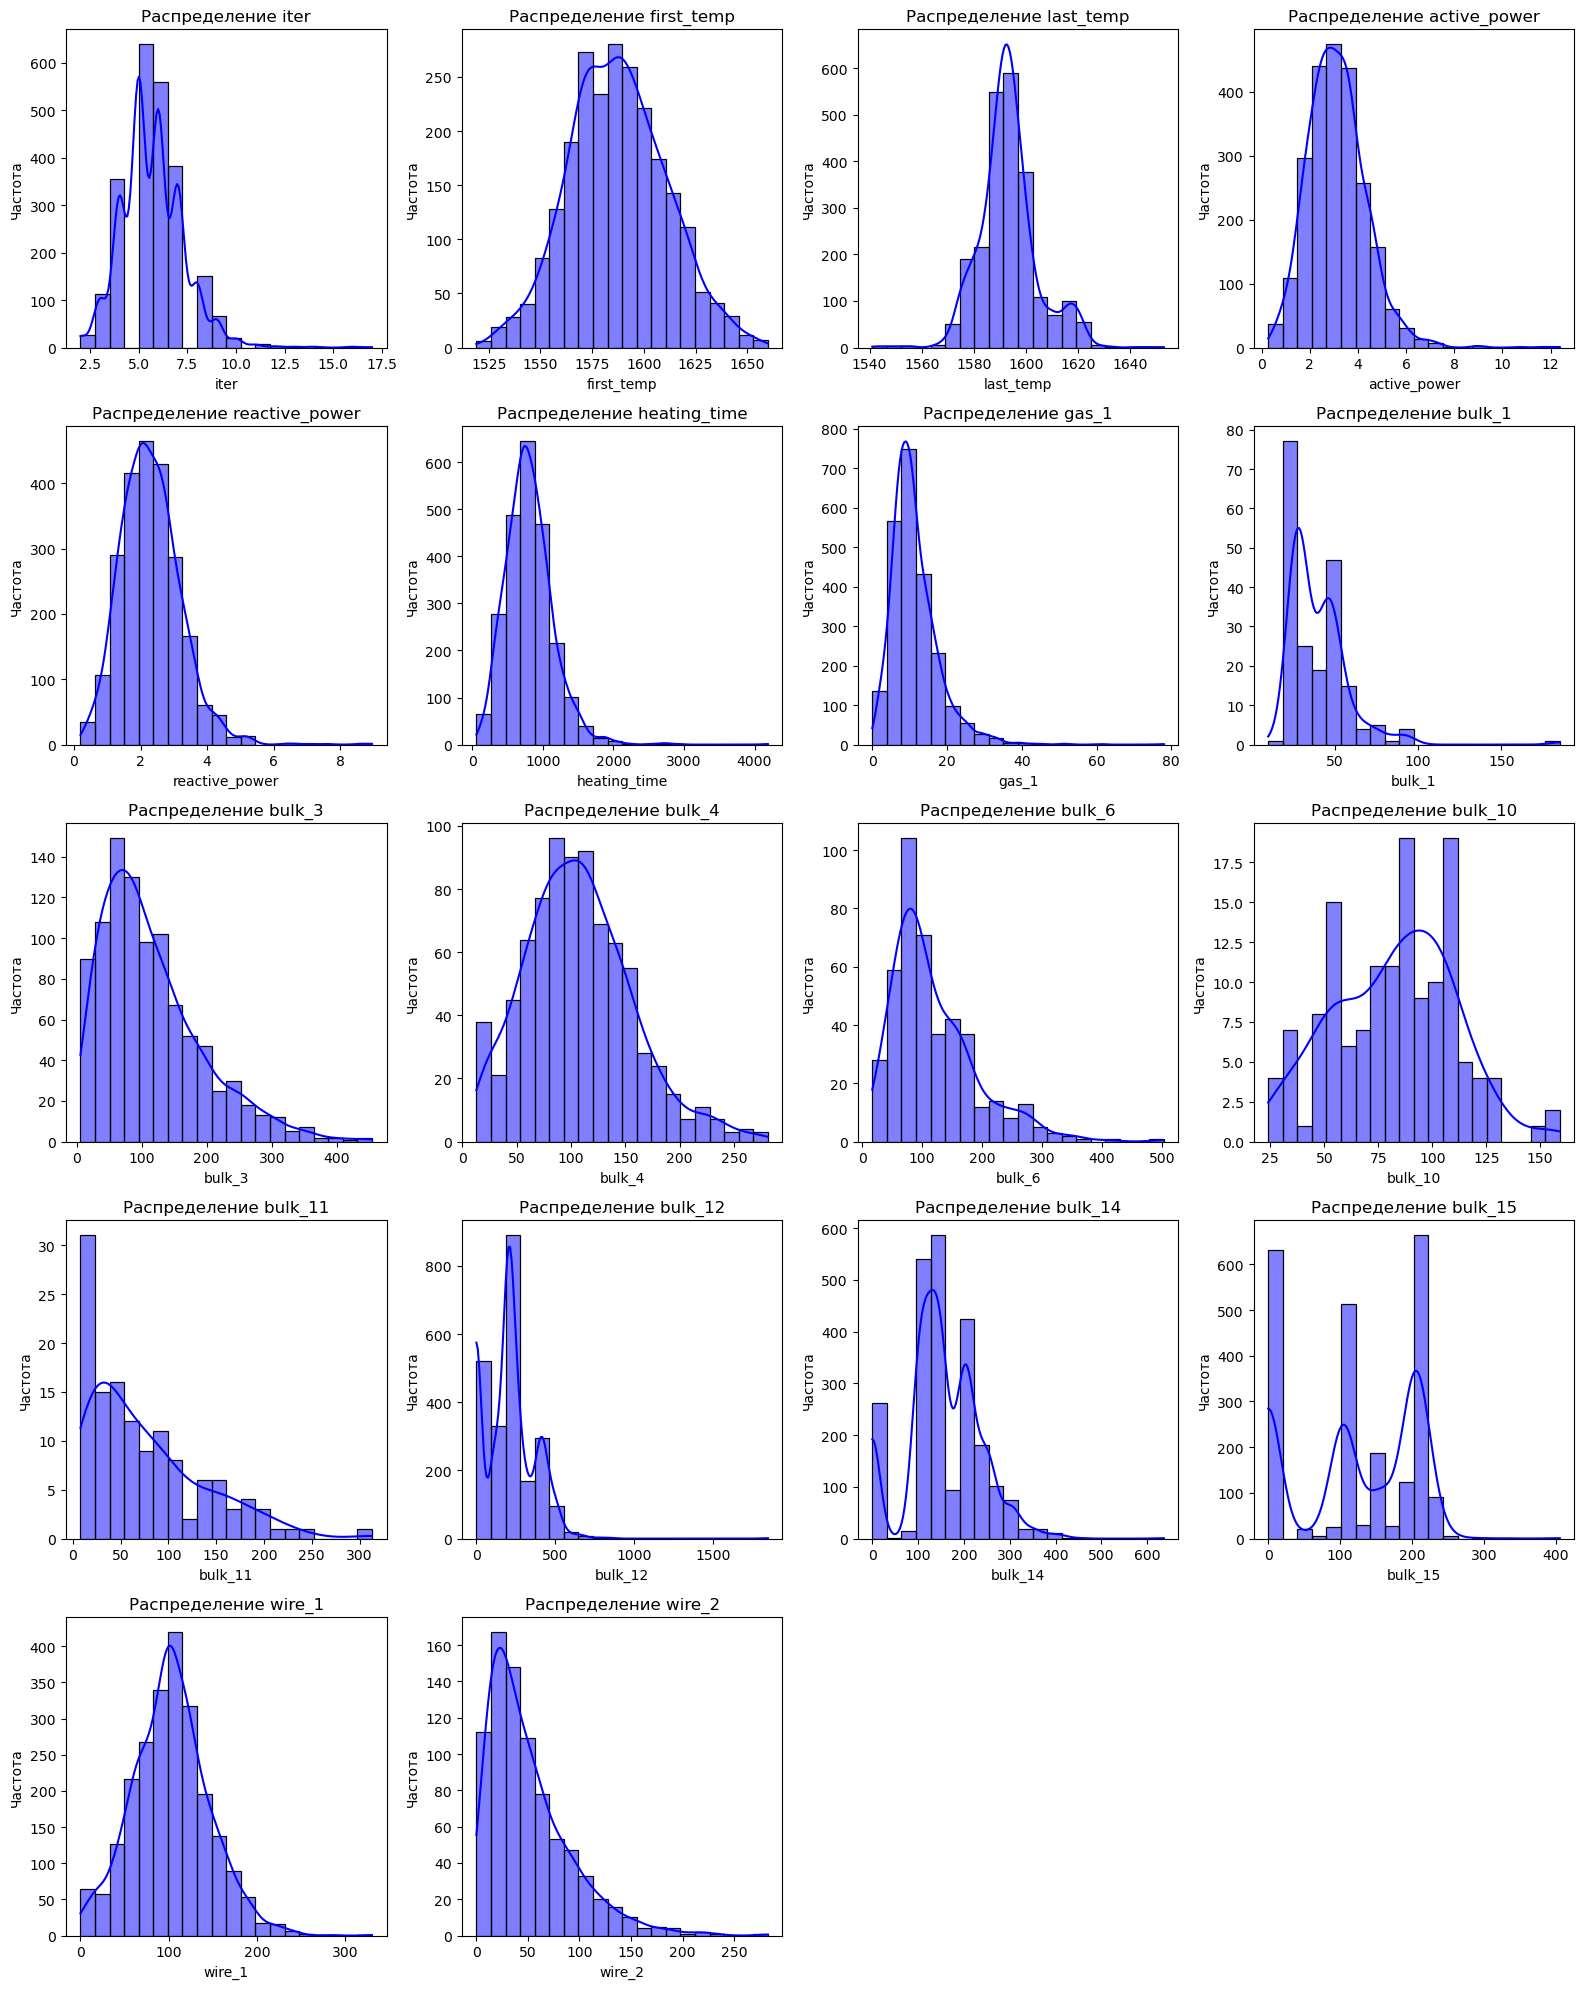

In [76]:
# Выбираем только числовые столбцы
numeric_columns = temp_pivot.drop(columns=['key'], errors='ignore').select_dtypes(include=['number']).columns

# Сетка графиков
num_plots = len(numeric_columns)
rows = (num_plots + 3) // 4

plt.figure(figsize=(16, rows * 4))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows, 4, i)
    
    # Исключаем нули
    column_data = temp_pivot[column]
    if (column_data == 0).mean() > 0.5:
        column_data = column_data[column_data != 0]
    
    sns.histplot(column_data, kde=True, bins=20, color="blue")
    plt.title(f"Распределение {column}")
    plt.xlabel(column)
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

Имеются выбросы которые необходимо убрать из обучающей выборки

Проведем корреляционный анализ

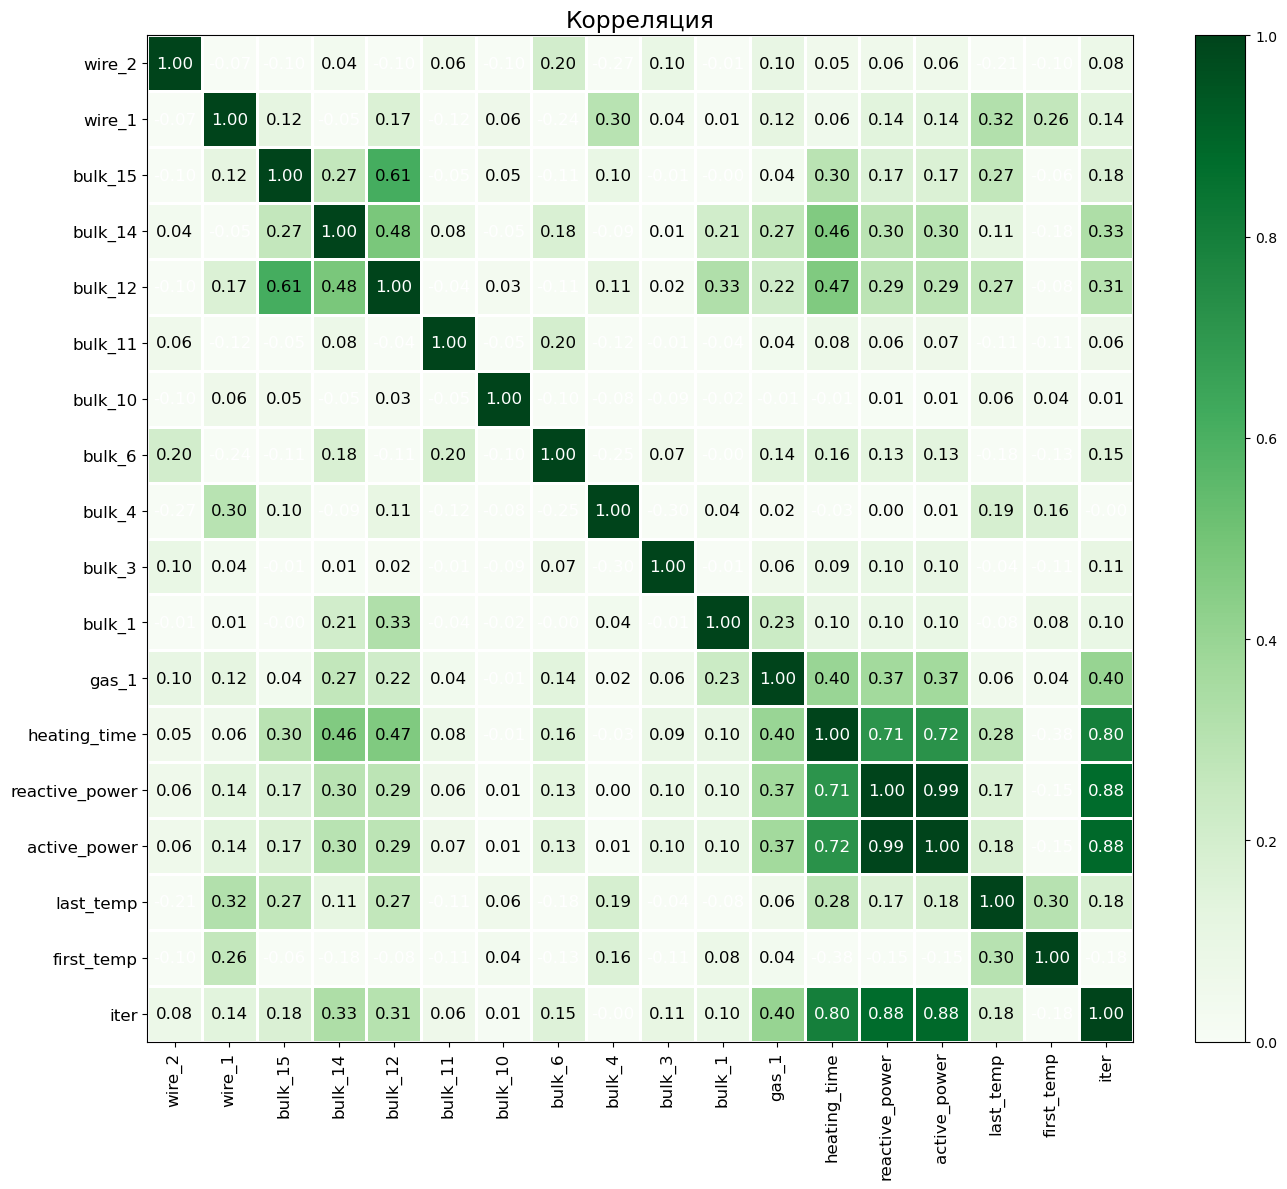

In [77]:
# Удаляем ненужные столбцы
temp_pivot_corr = temp_pivot.drop(columns=['key', 'first_time', 'last_time', 'bulk_time_max', 'wire_time_max'])

corr = temp_pivot_corr.corr()

# Строим график корреляционной матрицы
plot_correlation_matrix(
    corr.values,
    x_labels=corr.columns,
    y_labels=corr.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'Корреляция',
    fontsize_factor=1.2,
    figsize=(14, 12)
)

### Выводы

1. Мультиколлинеарность (для линейной регрессии необходимо исключить один из признаков):

- `active_power` и `reactive_power` (0.99): Между этими двумя признаками наблюдается практически идеальная линейная зависимость. Это ожидаемо, так как оба связаны с электроэнергией, и одно значение может быть производным от другого.
- `iter` и `active_power` (0.88): Количество повторений имеет высокую корреляцию с реактивной мощностью, что указывает на то, что большее количество итераций связано с увеличением энергопотребления.
- `iter` и `reactive_power` (0.88): Количество повторений имеет высокую корреляцию с реактивной мощностью, что указывает на то, что большее количество итераций связано с увеличением энергопотребления.

2. Корреляция:

- `heating_time` и `reactive_power`/`active_power` (0.72/0.72): Время нагрева имеет сильную связь с мощностью, что указывает на то, что процесс нагрева напрямую зависит от энергопотребления.
- `bulk_12` и `bulk_14` (0.48); `bulk_1` и `bulk_12` (0.35): Эти признаки имеют высокую взаимосвязь, что может говорить о том, что их значения часто зависят друг от друга, возможно, в процессе работы оборудования.
- `last_temp` умеренно коррелирует с переменными мощности: `heating_time` (0.28) и `first_temp` (0.3), что указывает на влияние времени нагрева и изначальной температуры на конечную температуру
- `gas_1` и `reactive_power`/`active_power` (0.37): Указывает на умеренно сильную положительную связь
- `last_temp` и `wire_1` (0.32): Указывает на умеренно сильную положительную связь

3. Отсутствие корреляции:

- `bulk_10`: Этот признак почти не коррелирует с другими (все значения корреляции близки к 0), что делает его либо независимым, либо слабозначимым для анализа.

## Подготовка данных

In [78]:
RANDOM_STATE = 130125
TEST_SIZE = 0.25
train, test = train_test_split(temp_pivot, test_size=TEST_SIZE, random_state=RANDOM_STATE)

Избавимся от выбросов в обучающей выборке

In [79]:
train = train[train['last_time'] > train['wire_time_max']]
train = train[train['last_time'] > train['bulk_time_max']]
train = train[train['gas_1'] < 40]
train = train[train['active_power'] < 8]
train = train[train['reactive_power'] < 6]

print(train.shape)
print(test.shape)

(1725, 23)
(583, 23)


Уберем столбцы:
- `key`
- Все столбцы с форматом `datetime` 
- `bulk_10` (практически нулевая корреляция)

In [80]:
X_train = train.drop(['key', 'last_temp', 'first_time', 'last_time', 'bulk_time_max', 'wire_time_max', 'bulk_10'], axis=1)
y_train = train['last_temp']

X_test = test.drop(['key', 'last_temp', 'first_time', 'last_time', 'bulk_time_max', 'wire_time_max', 'bulk_10'], axis=1)
y_test = test['last_temp']

Масштабируем данные

In [81]:
num_columns = ['first_temp', 'heating_time', 'iter', 'active_power', 'reactive_power', 'bulk_1', 'bulk_3',
               'bulk_4', 'bulk_6', 'bulk_11', 'bulk_12', 'bulk_14', 'bulk_15', 'gas_1', 'wire_1', 'wire_2']

num_transformer = StandardScaler()
X_train[num_columns] = num_transformer.fit_transform(X_train[num_columns])
X_test[num_columns] = num_transformer.transform(X_test[num_columns])

Для линейной регрессии необходимо убрать признаки с мультиколлинеарностью 

In [82]:
X_train_linear = train.drop(['key', 'last_temp', 'first_time', 'last_time', 'bulk_time_max', 'wire_time_max', 'bulk_10',
                     'iter', 'reactive_power'], axis=1)

X_test_linear = test.drop(['key', 'last_temp', 'first_time', 'last_time', 'bulk_time_max', 'wire_time_max', 'bulk_10',
                     'iter', 'reactive_power'], axis=1)

num_columns = ['first_temp', 'heating_time', 'active_power', 'bulk_1', 'bulk_3',
               'bulk_4', 'bulk_6', 'bulk_11', 'bulk_12', 'bulk_14', 'bulk_15', 'gas_1', 'wire_1', 'wire_2']

# Масштабируем
num_transformer = StandardScaler()
X_train_linear[num_columns] = num_transformer.fit_transform(X_train_linear[num_columns])
X_test_linear[num_columns] = num_transformer.transform(X_test_linear[num_columns])

### Выводы

- Избавились от выбросов в обучающей выборке
- Удалили столбцы с датами и признаки с нулевой корреляцией
- Применили маштабирование для признаков
- Для линейной регрессии убрали признаки с мультиколлинеарностью 

## Обучение моделей машинного обучения

Обучим пять моделей:
- LinearRegression
- RandomForestRegressor
- CatBoostRegressor
- LGBMRegressor
- DummyRegressor

In [83]:
%%time

# Модель
linear_model = LinearRegression()

# Запускаем кросс-валидацию
cv_scores = cross_val_score(linear_model, X_train_linear, y_train, 
                                 cv=2, scoring='neg_mean_absolute_error')

mae_scores = -cv_scores

# Находим лучший результат
best_mae_linear = np.min(mae_scores)
print("Лучшая метрика MAE:", best_mae_linear)

Лучшая метрика MAE: 6.164874212328352
CPU times: total: 125 ms
Wall time: 37.5 ms


In [84]:
%%time

# Модель RandomForest
rf_model = RandomForestRegressor(random_state=RANDOM_STATE)

# Определяем диапазоны гиперпараметров
param_dist = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# RandomizedSearchCV для RandomForest
random_search = RandomizedSearchCV(
    rf_model, 
    param_distributions=param_dist, 
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=3,
    random_state=RANDOM_STATE,
    verbose=0,
    n_jobs=-1,
    refit=True
)

# Обучаем модель
random_search.fit(X_train, y_train)

# Получаем лучшие гиперпараметры
best_params_rf = random_search.best_params_
print("Лучшие гиперпараметры:", best_params_rf)

# Лучшая метрика MAE
best_mae_rf = -random_search.best_score_
print("Лучшая метрика MAE:", best_mae_rf)

Лучшие гиперпараметры: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4}
Лучшая метрика MAE: 6.243016231837561
CPU times: total: 3.39 s
Wall time: 9.74 s


In [85]:
%%time

# CatBoost
catboost_model = CatBoostRegressor(silent=True)

# Определяем диапазоны гиперпараметров
param_dist = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.02, 0.05, 0.1],
    'depth': [5, 8, 10]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    catboost_model, 
    param_distributions=param_dist, 
    n_iter=10,
    scoring='neg_mean_absolute_error',
    cv=3,
    random_state=RANDOM_STATE,
    verbose=0,
    n_jobs=-1,
    refit=True
)

# Обучаем модель
random_search.fit(X_train, y_train)

# Получаем лучшие гиперпараметры
best_params = random_search.best_params_
print("Лучшие гиперпараметры:", best_params)

# Лучшая метрика MAE
best_mae_catboost = -random_search.best_score_ 
print("Лучшая метрика MAE:", best_mae_catboost)

Лучшие гиперпараметры: {'learning_rate': 0.1, 'iterations': 100, 'depth': 5}
Лучшая метрика MAE: 6.0746316807020095
CPU times: total: 1.52 s
Wall time: 44.7 s


In [86]:
%%time

# LGBM
lgbm_model = LGBMRegressor()

# Определяем диапазоны гиперпараметров
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.02, 0.05, 0.1],
    'num_leaves': [20, 35, 50]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    lgbm_model, 
    param_distributions=param_dist, 
    n_iter=5,
    scoring='neg_mean_absolute_error',
    cv=2,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0,
    refit=True
)

# Обучаем модель
random_search.fit(X_train, y_train)

# Получаем лучшие гиперпараметры
best_params = random_search.best_params_
print("Лучшие гиперпараметры:", best_params)
best_mae_lgbm = -random_search.best_score_
print("Лучшая метрика MAE:", best_mae_lgbm)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 1725, number of used features: 16
[LightGBM] [Info] Start training from score 1593.360580
Лучшие гиперпараметры: {'num_leaves': 35, 'n_estimators': 100, 'learning_rate': 0.02}
Лучшая метрика MAE: 6.371672004572521
CPU times: total: 797 ms
Wall time: 4.57 s


In [87]:
%%time

# Модель Dummy
dummy_model = DummyRegressor(strategy='mean')  

# Кросс-валидация с DummyRegressor
cv_scores = cross_val_score(dummy_model, X_train, y_train, 
                                cv=3, scoring='neg_mean_absolute_error')

# Преобразуем результат в положительное значение
mae_scores = -cv_scores

# Находим лучший результат
best_mae_dummy = np.min(mae_scores)
print("Лучшая метрика MAE:", best_mae_dummy)

Лучшая метрика MAE: 7.670318336483925
CPU times: total: 93.8 ms
Wall time: 17.9 ms


In [88]:
results = pd.DataFrame({'Models':['Linear Regression', 'RandomForest', 'CatBoost', 'LightGBM', 'dummy_model'],
                       'Best_valid_MAE': [best_mae_linear, best_mae_rf, best_mae_catboost, best_mae_lgbm, best_mae_dummy]})

display(results)

,Models,Best_valid_MAE
0,Linear Regression,6.164874
1,RandomForest,6.243016
2,CatBoost,6.074632
3,LightGBM,6.371672
4,dummy_model,7.670318


Лучше всего себя показала модель `CatBoost`. Метрика `MAE` на валиционной выборке составила `6.07`. Гиперпараметры модели: `learning_rate`= `0.1`, `iterations` = `100`, `depth` = `5`. Результат Dummy модели сильно хуже `7.67`. Проверим модель CatBoost на тестовой выборке.

In [89]:
# Инициализируем модель CatBoostRegressor
catboost_model = CatBoostRegressor(silent=True, learning_rate=0.1, iterations=100, depth=5)

# Обучаем модель
catboost_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = catboost_model.predict(X_test)

# Оценка качества модели
mae_catboost = mean_absolute_error(y_test, y_pred)
print(f"MAE на тестовой выборке для модели catboost: {mae_catboost:.4f}")

MAE на тестовой выборке для модели catboost: 6.1513


In [90]:
from sklearn.metrics import mean_absolute_error, r2_score

# Инициализируем модель CatBoostRegressor
catboost_model = CatBoostRegressor(silent=True, learning_rate=0.1, iterations=100, depth=5)

# Обучаем модель
catboost_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = catboost_model.predict(X_test)

# Оценка качества модели
mae_catboost = mean_absolute_error(y_test, y_pred)
r2_catboost = r2_score(y_test, y_pred)

print(f"MAE на тестовой выборке для модели catboost: {mae_catboost:.4f}")

MAE на тестовой выборке для модели catboost: 6.1513


MAE на тестовой выборке составил `6.15`. Условие по метрике `MAE < 6.8` на тестовой выборке выполнено. Рассмотрим важность признаков.

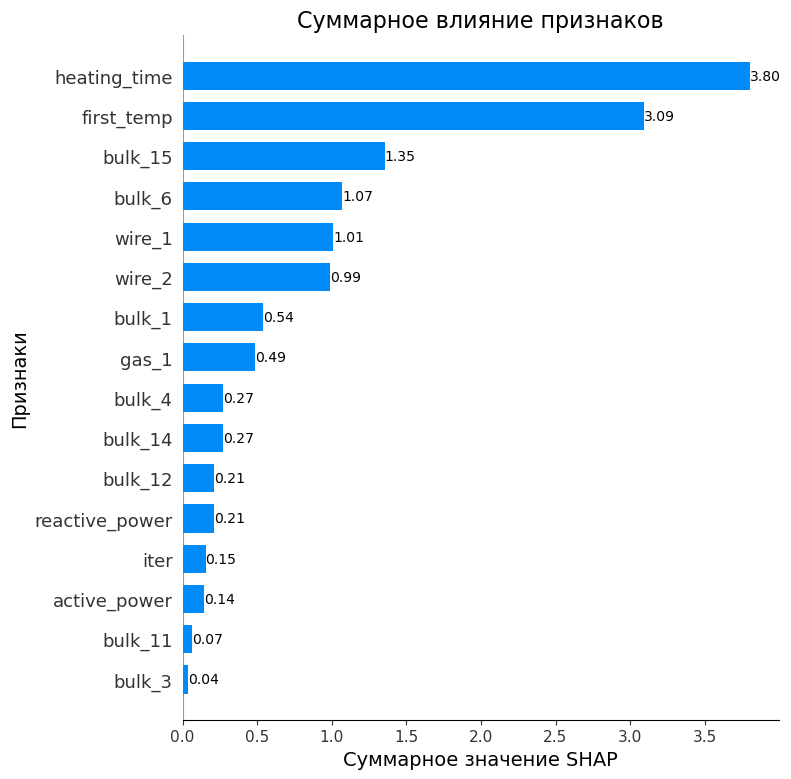

In [91]:
# Создаем объект Explainer
explainer = shap.TreeExplainer(catboost_model)

# Рассчитываем значения SHAP
shap_values = explainer.shap_values(X_test)

# Визуализация влияния признаков
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)

# Получаем значения SHAP
shap_means = np.abs(shap_values).mean(axis=0)
feature_names = X_test.columns
sorted_indices = np.argsort(shap_means)[::-1]

# Инвертируем порядок
sorted_features = feature_names[sorted_indices]
sorted_shap_means = shap_means[sorted_indices]
sorted_indices_for_plot = range(len(sorted_features) - 1, -1, -1)  # Инвертируем индексы для Y

# Подписываем значения
for i, (index, value) in enumerate(zip(sorted_indices_for_plot, sorted_shap_means)):
    plt.text(
        value, 
        index, 
        f"{value:.2f}", 
        va="center", 
        ha="left", 
        fontsize=10
    )

# Настраиваем график
plt.title("Суммарное влияние признаков", fontsize=16)
plt.xlabel("Суммарное значение SHAP", fontsize=14)
plt.ylabel("Признаки", fontsize=14)
plt.tight_layout()
plt.show()

Наиболее важным признаком для модели оказался созданный признак `heating_time`. Важность признака составила `3.8`. Затем идёт `first_temp` - `3.09`. Далее `bulk_15`- `1.35` и `bulk_6` - `1.01`.

### Выводы

Обучено пять моделей. MAE для каждой из них:

- LinearRegression - `6.16`
- RandomForestRegressor - `6.24`
- CatBoostRegressor - `6.07`
- LGBMRegressor - `6.36`
- DummyRegressor - `7.67`

Лучше всего себя показала модель `CatBoost`. Метрика `MAE` на валиционной выборке составила `6.07`. Гиперпараметры модели: `learning_rate`= `0.1`, `iterations` = `100`, `depth` = `5`. Результат Dummy модели сильно хуже `7.67`.

MAE на тестовой выборке составил `6.15`. Условие по метрике `MAE < 6.8` на тестовой выборке выполнено. Рассмотрим важность признаков.

Наиболее важным признаком для модели оказался созданный признак `heating_time`. Важность признака составила `3.8`. Затем идёт `first_temp` - `3.09`. Далее `bulk_15`- `1.35` и `bulk_6` - `1.01`.

## Общий вывод и рекомендации заказчику

**Загрузка данных**

- Датафреймы успешно загружены
- Названия столбцов необходимо привести к формату snake_case
- В датафреймах связанных с bulk и wire имеется большое количество пропусков

**Исследовательский анализ и предобработка данных**

- Привели названия столбцов к формату `snake_case`
- Привели столбцы с датами к типу `datetime`
- `active_power` - Признак имеет распределение Пуассона, аномалий и выбросов не обнаружено. Медиана находится на уровне `0.6` единиц.
- `reactive_power` - Удалена аномалия с отрицательной температурой. Признак имеет распределение Пуассона. Медиана находится на уровне `0.44` единиц.
- Из датафреймов `bulk` и `wire` удалены столбцы имеющие менее 100 строк с заполненными данными
- Заполили пропуски в датафреймах `data_bulk` и `data_wire`нулями
- Аномалий в датах не обнаружено
- `gas-1` - Имеются выбросы после 40 единиц. Уберём их из обучающей выборки. Медиана и находится на уровне `9.8` единиц.
- `temp` - Избавились от аномалий. Температура дожна быть больше 1500 градусов. Медиана и среднее находятся на уровне `1590` градусов.

**Объединение данных**

- Создали сводную таблицу, выполнили агрегацию, вывели первый и последний замер с температурами
- Удалили партии где проводился всего один замер
- Создали признак `количество итераций`
- Создали признак `время нагрева`
- Создали признаки `последней подачи материалов и проволочных материалов`
- Добавили в итоговый датафрейм признаки:
    - `active_power`
    - `reactive_power`
    - `bulk`
    - `wire`
    - `gas_1`
    
**Исследовательский анализ и предобработка данных объединённого датафрейма**

Имеются выбросы которые необходимо убрать из обучающей выборки

1. Мультиколлинеарность (для линейной регрессии необходимо исключить один из признаков):

- `active_power` и `reactive_power` (0.99): Между этими двумя признаками наблюдается практически идеальная линейная зависимость. Это ожидаемо, так как оба связаны с электроэнергией, и одно значение может быть производным от другого.
- `iter` и `active_power` (0.88): Количество повторений имеет высокую корреляцию с реактивной мощностью, что указывает на то, что большее количество итераций связано с увеличением энергопотребления.
- `iter` и `reactive_power` (0.88): Количество повторений имеет высокую корреляцию с реактивной мощностью, что указывает на то, что большее количество итераций связано с увеличением энергопотребления.

2. Корреляция:

- `heating_time` и `reactive_power`/`active_power` (0.72/0.72): Время нагрева имеет сильную связь с мощностью, что указывает на то, что процесс нагрева напрямую зависит от энергопотребления.
- `bulk_12` и `bulk_14` (0.48); `bulk_1` и `bulk_12` (0.35): Эти признаки имеют высокую взаимосвязь, что может говорить о том, что их значения часто зависят друг от друга, возможно, в процессе работы оборудования.
- `last_temp` умеренно коррелирует с переменными мощности: `heating_time` (0.28) и `first_temp` (0.3), что указывает на влияние времени нагрева и изначальной температуры на конечную температуру
- `gas_1` и `reactive_power`/`active_power` (0.37): Указывает на умеренно сильную положительную связь
- `last_temp` и `wire_1` (0.32): Указывает на умеренно сильную положительную связь

3. Отсутствие корреляции:

- `bulk_10`: Этот признак почти не коррелирует с другими (все значения корреляции близки к 0), что делает его либо независимым, либо слабозначимым для анализа.

**Подготовка данных**

- Избавились от выбросов в обучающей выборке
- Удалили столбцы с датами и признаки с нулевой корреляцией
- Применили маштабирование для признаков
- Для линейной регрессии убрали признаки с мультиколлинеарностью 

**Обучение моделей машинного обучения**

Обучено пять моделей. MAE для каждой из них:

- LinearRegression - `6.16`
- RandomForestRegressor - `6.24`
- CatBoostRegressor - `6.07`
- LGBMRegressor - `6.36`
- DummyRegressor - `7.67`

Лучше всего себя показала модель `CatBoost`. Метрика `MAE` на валиционной выборке составила `6.07`. Гиперпараметры модели: `learning_rate`= `0.1`, `iterations` = `100`, `depth` = `5`. Результат Dummy модели сильно хуже `7.67`.

MAE на тестовой выборке составил `6.15`. Условие по метрике `MAE < 6.8` на тестовой выборке выполнено. Рассмотрим важность признаков.

Наиболее важным признаком для модели оказался созданный признак `heating_time`. Важность признака составила `3.8`. Затем идёт `first_temp` - `3.09`. Далее `bulk_15`- `1.35` и `bulk_6` - `1.01`.

**Рекомендации заказчику**

Рекомендуется использовать модель `CatBoostRegressor` для прогнозирования расходов, так как она показала наилучшие результаты с метрикой MAE = `6.15` (в среднем модель ошибается на 6 градусов). Также следует обратить внимание на признак `heating_time`, который имеет наибольшую важность для модели и может быть ключевым для оптимизации процессов